In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/IndiaAQI.csv")
print(df.head())

  Country           State       City                         Station  \
0   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
1   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
2   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
3   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   
4   India  Andhra_Pradesh  Amaravati  Secretariat, Amaravati - APPCB   

    Latitude  Longitude          Last Update Pollutant  Min  Max  Avg  AQI  \
0  16.515083  80.518167  20-11-2023 12:00:00     PM2.5  NaN  NaN  NaN  NaN   
1  16.515083  80.518167  20-11-2023 12:00:00      PM10  NaN  NaN  NaN  NaN   
2  16.515083  80.518167  20-11-2023 12:00:00       SO2  NaN  NaN  NaN  NaN   
3  16.515083  80.518167  20-11-2023 12:00:00        CO  NaN  NaN  NaN  NaN   
4  16.515083  80.518167  20-11-2023 12:00:00     OZONE  NaN  NaN  NaN  NaN   

  Predominant Parameter  
0                   NaN  
1                   NaN  
2                   

In [ ]:
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
#random forest regressor model
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 23.22303851927788
R^2 Score: 0.9974837762405427


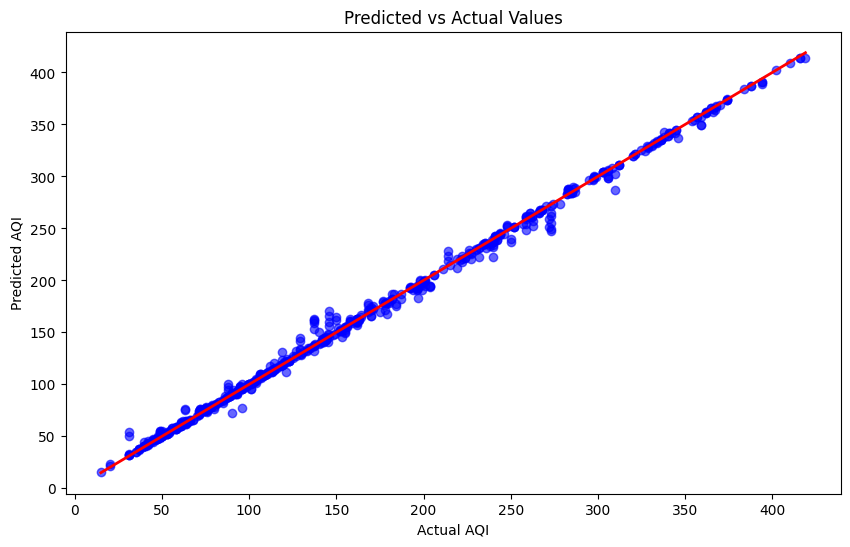

In [ ]:
#scatter plot
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line for perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

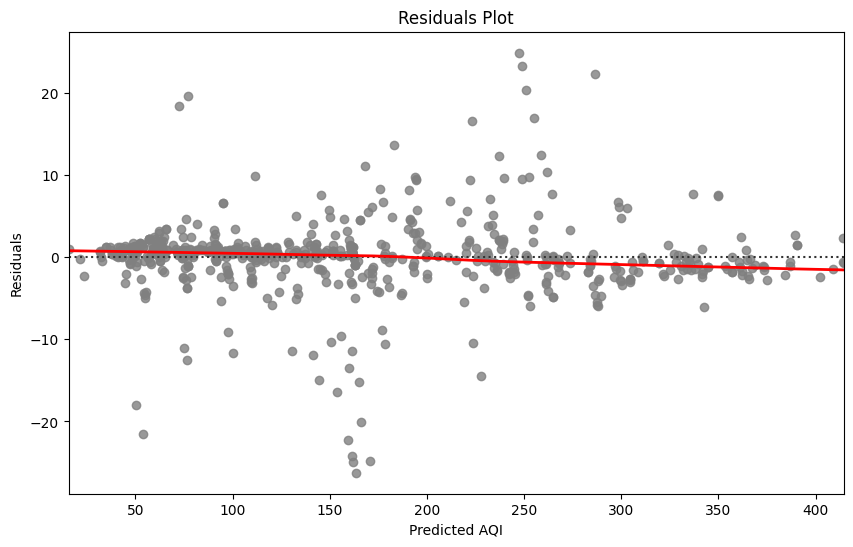

In [ ]:
#residue plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="grey", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
tolerance = 0.1  # 10% tolerance
accuracy = np.mean(np.abs(y_test - y_pred) / y_test < tolerance) * 100
print(f'Accuracy (within ±10% range): {accuracy:.2f}%')

Accuracy (within ±10% range): 96.50%


In [ ]:
#linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 3.536187036613586e-26
R^2 Score: 1.0
Accuracy: 100.00%


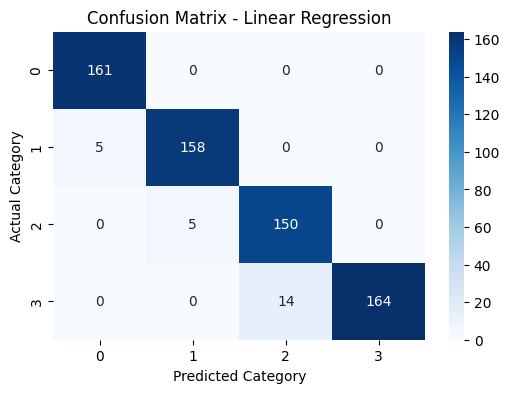

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Linear Regression")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

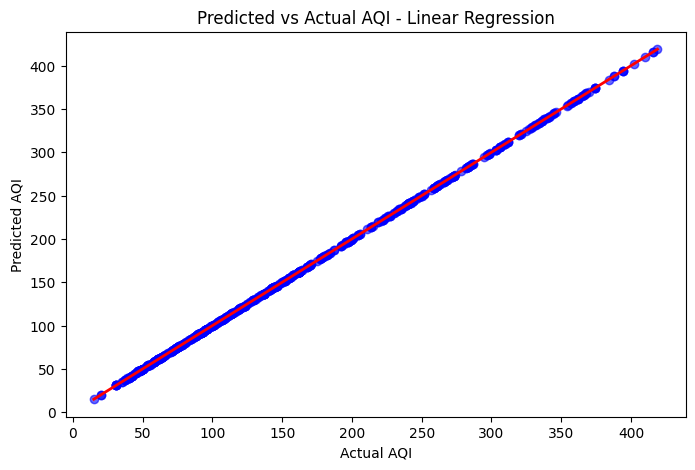

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - Linear Regression')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

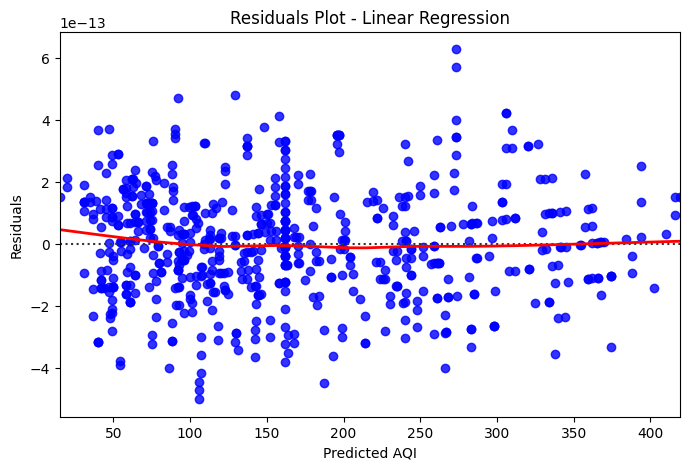

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - Linear Regression')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

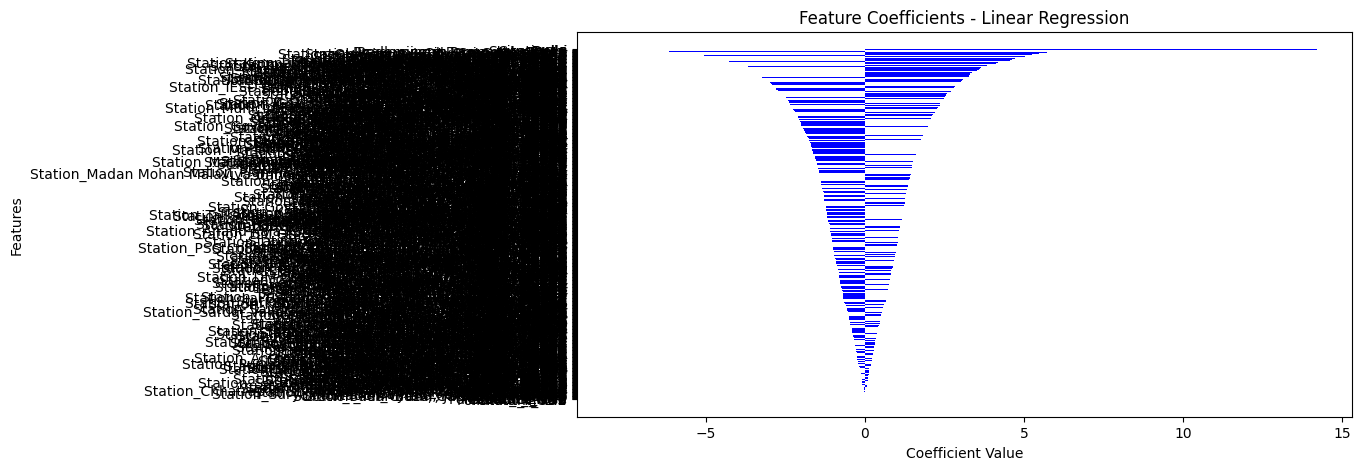

In [ ]:
# Coefficients Plot
coef = model.coef_
features = X.columns
indices = np.argsort(np.abs(coef))[::-1]

plt.figure(figsize=(10, 5))
plt.barh(range(len(features)), coef[indices], align="center", color="blue")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Coefficients - Linear Regression")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#decision tree regressor model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 428.0305349538287
R^2 Score: 0.9536227526415206
Accuracy: 95.36%


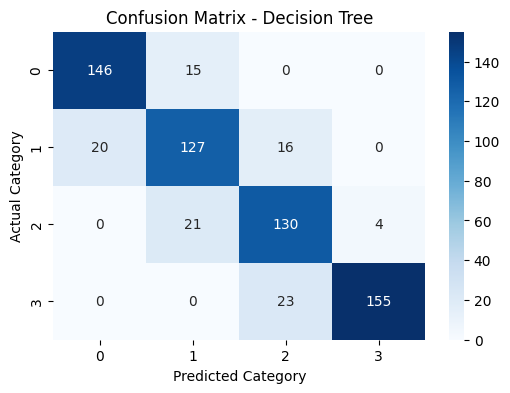

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

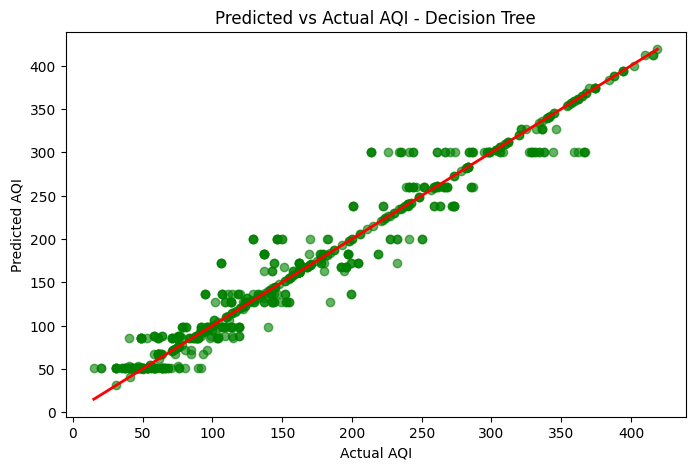

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - Decision Tree')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

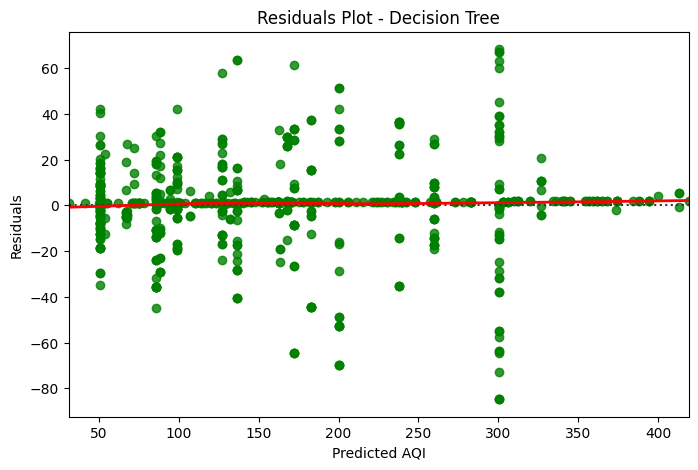

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="green", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - Decision Tree')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#support vector regressor model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train Support Vector Regressor
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 3702.672458726371
R^2 Score: 0.598814237576987
Accuracy: 59.88%


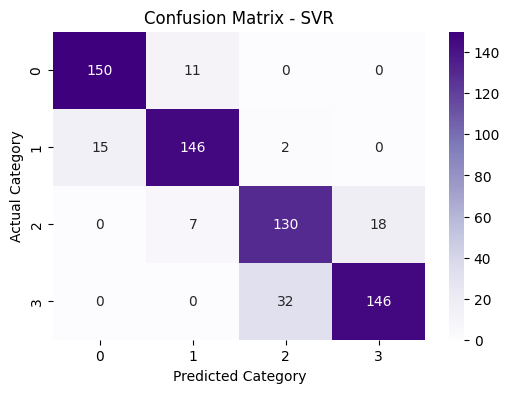

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix - SVR")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

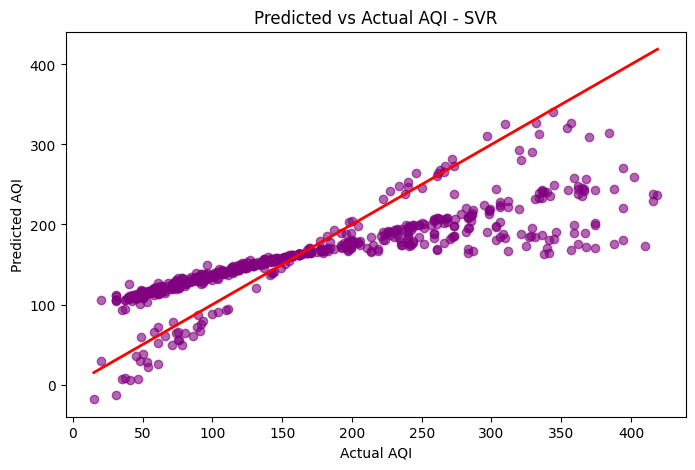

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - SVR')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

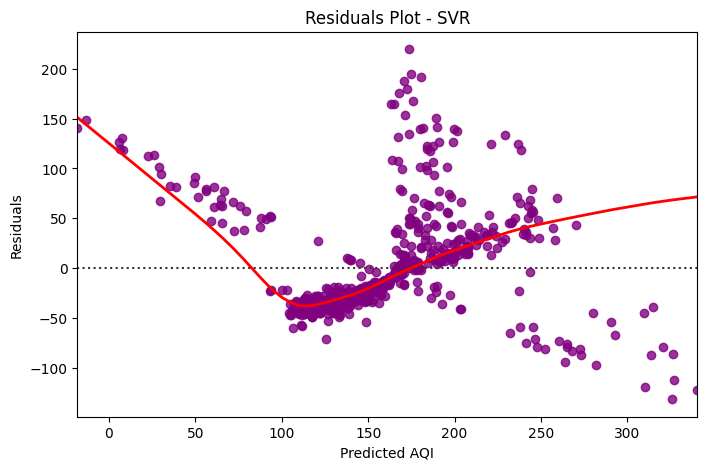

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - SVR')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#gradient boosting regressor model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features (Gradient Boosting doesn't require scaling, but keeping consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 464.322718117001
R^2 Score: 0.9496904828189501
Accuracy: 94.97%


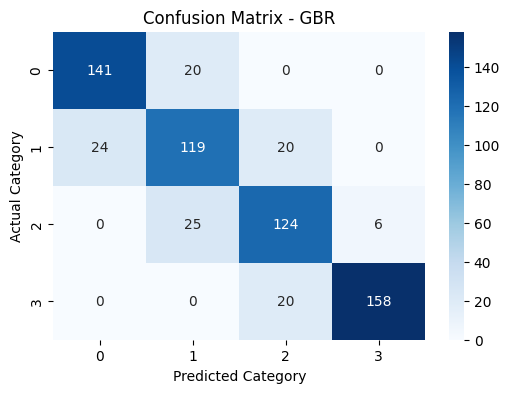

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - GBR")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()


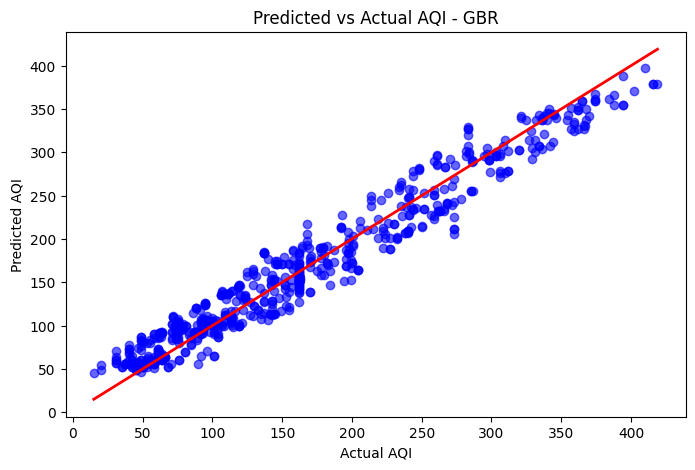

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - GBR')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

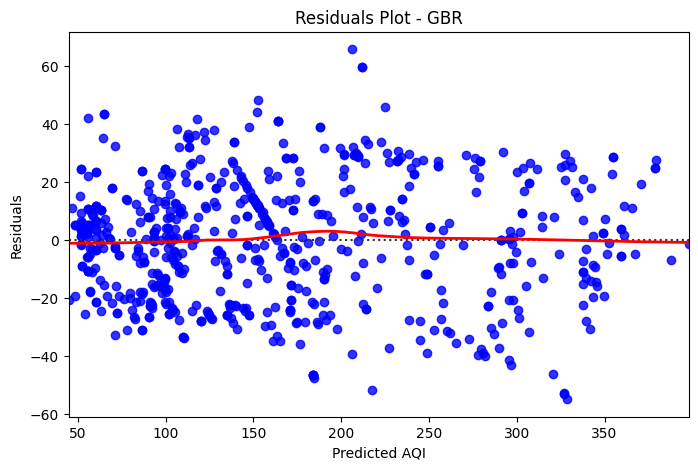

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - GBR')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

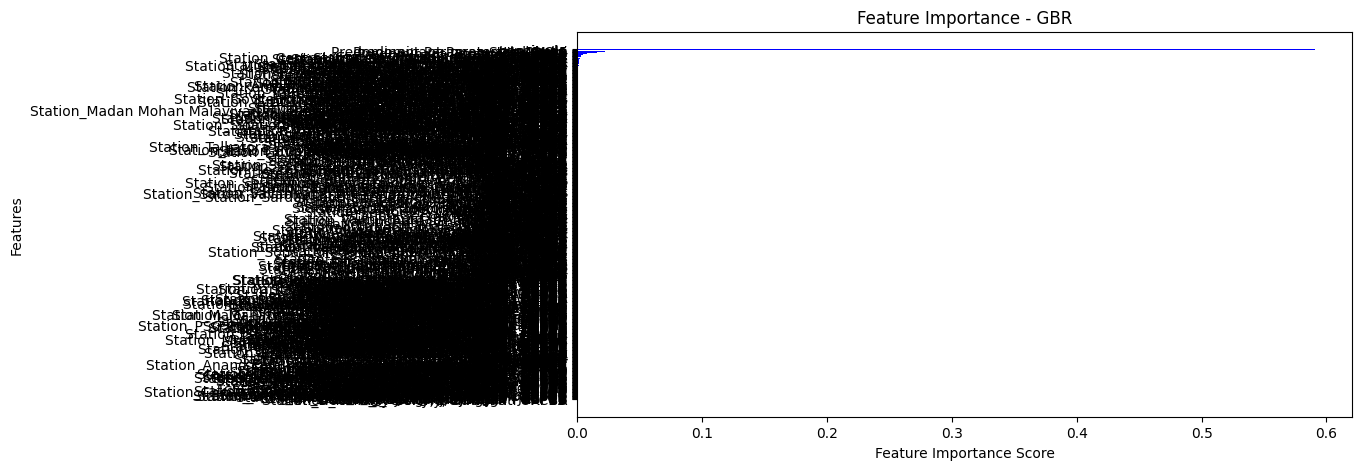

In [ ]:
feature_importance = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 5))
plt.barh(range(len(features)), feature_importance[indices], align="center", color="blue")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - GBR")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#XGB Regressor Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features (XGBoost can handle unscaled data, but keeping consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train XGBoost Regressor
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 588.0750622066599
R^2 Score: 0.9362818761791063
Accuracy: 93.63%


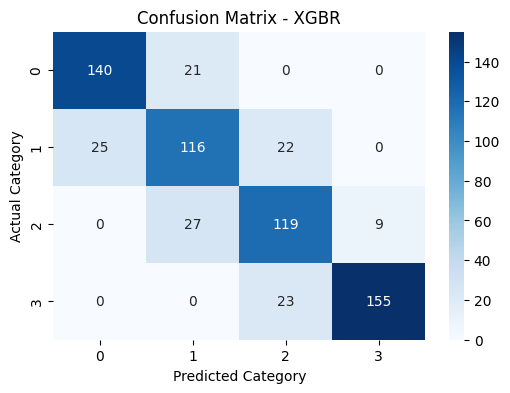

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - XGBR")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

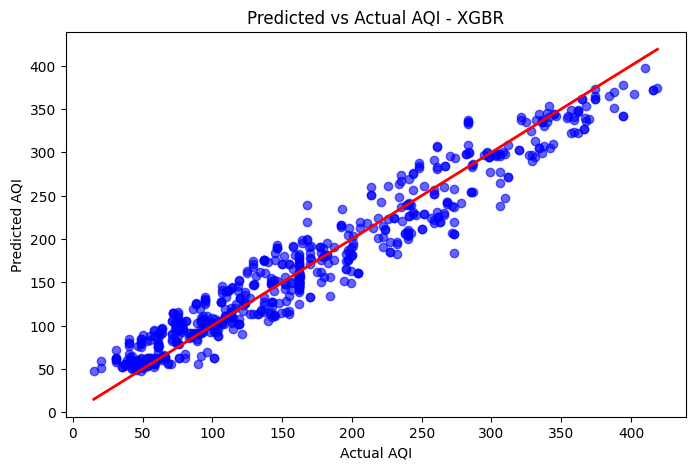

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - XGBR')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

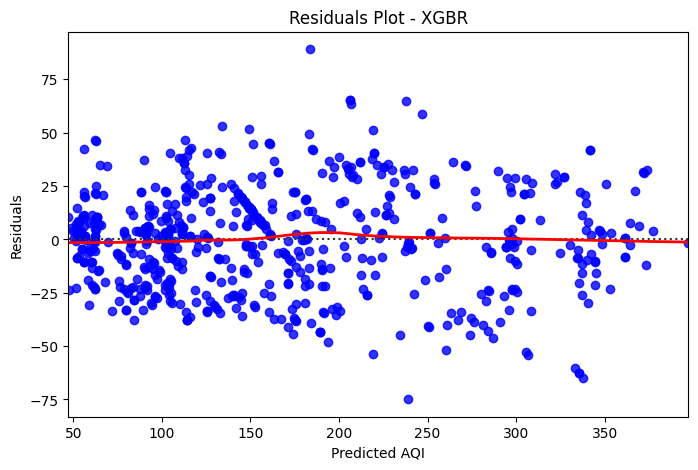

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - XGBR')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

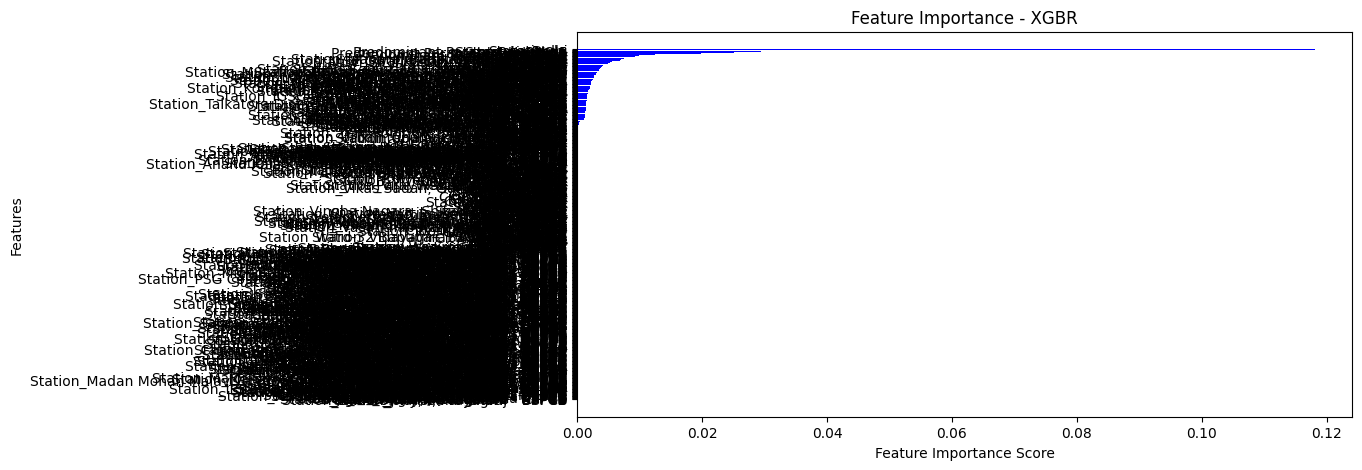

In [ ]:
feature_importance = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 5))
plt.barh(range(len(features)), feature_importance[indices], align="center", color="blue")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBR")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#KNN Regressor model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/IndiaAQI.csv")
df['Min'].fillna(df['Min'].mean(), inplace=True)
df['Max'].fillna(df['Max'].mean(), inplace=True)
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df['AQI'].fillna(df['AQI'].mean(), inplace=True)
df['Predominant Parameter'].fillna('Unknown', inplace=True)

In [ ]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['AQI'])
y = df_encoded['AQI']

# Discretizing AQI for classification-like evaluation
y_categories = pd.qcut(y, q=4, labels=False)  # Convert AQI into 4 categories

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize features (KNN requires scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train KNN Regressor
model = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert predictions to AQI categories for confusion matrix
y_pred_cat = pd.qcut(y_pred, q=4, labels=False, duplicates='drop')

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error: 24.71904618558204
R^2 Score: 0.997321683324443
Accuracy: 99.73%


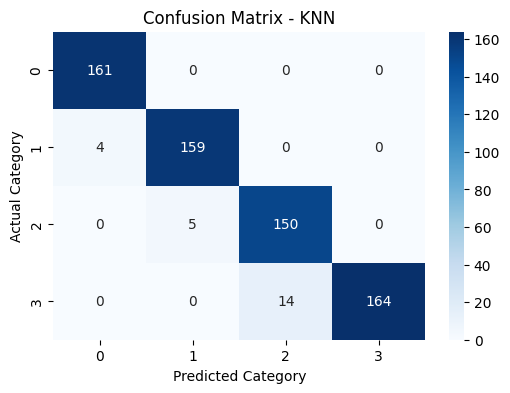

In [ ]:
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

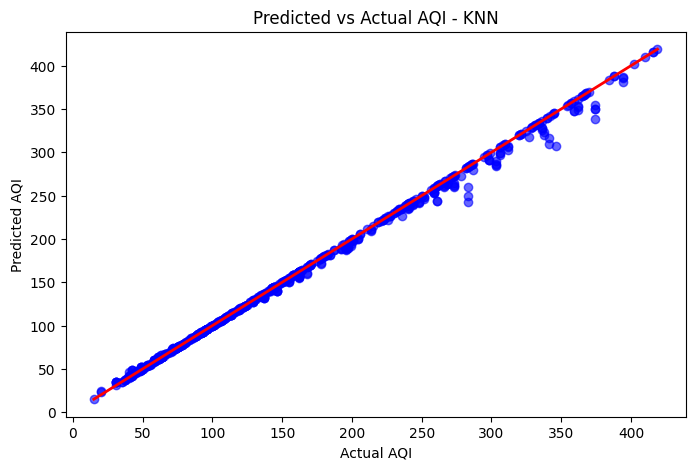

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual AQI - KNN')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()

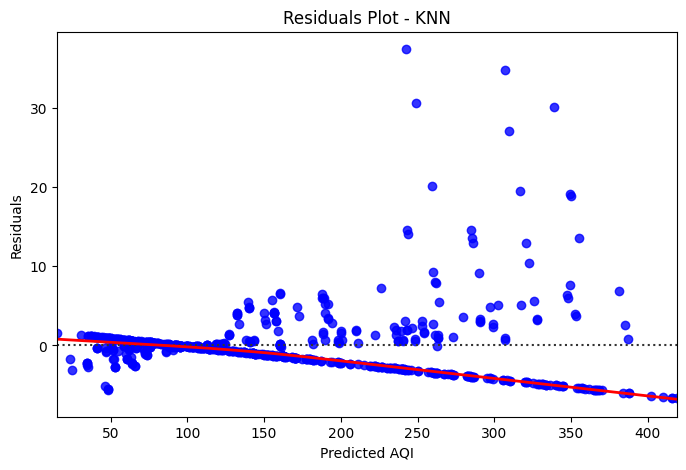

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title('Residuals Plot - KNN')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#metrics evaluation of all 3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Model Names
models = ["Random Forest", "Linear Regression", "Decision Tree", "SVR", "Gradient Boost", "XGBoost", "KNN"]

# Performance Metrics
mse_values = [23.22, 3.53e-26, 428.03, 3702.67, 464.32, 588.07, 24.71]  # Mean Squared Error
r2_values = [0.9975, 1.0, 0.9536, 0.5988, 0.9497, 0.9363, 0.9973]  # R^2 Score
accuracy_values = [96.50, 100.00, 95.36, 59.88, 94.97, 93.63, 99.73]  # Accuracy %

# Set style
sns.set_style("whitegrid")

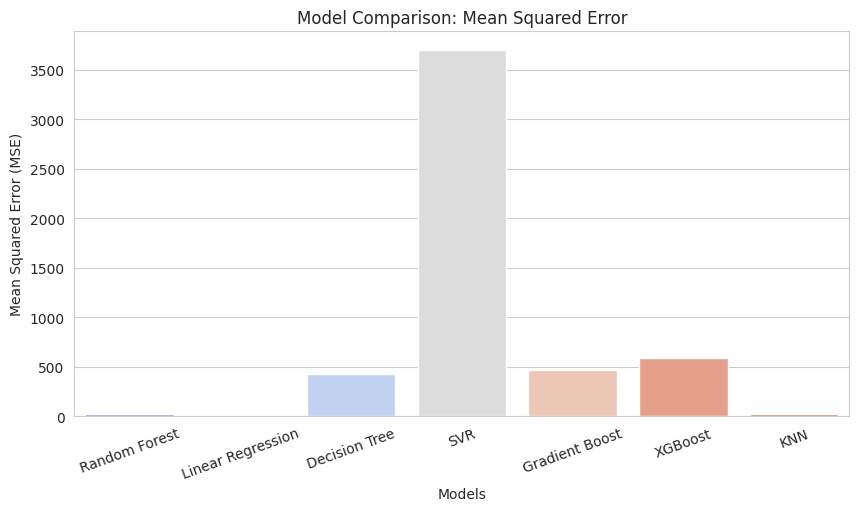

In [ ]:
#Plot 1: Bar Chart - Mean Squared Error Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mse_values, palette="coolwarm")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Models")
plt.title("Model Comparison: Mean Squared Error")
plt.xticks(rotation=20)
plt.show()

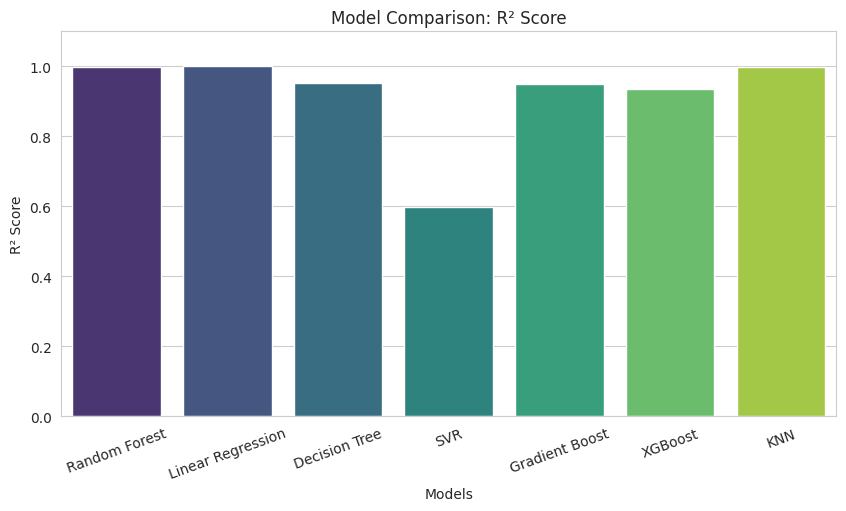

In [ ]:
#Plot 2: Bar Chart - R² Score Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_values, palette="viridis")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.title("Model Comparison: R² Score")
plt.xticks(rotation=20)
plt.ylim(0, 1.1)  # R² Score is between 0 and 1
plt.show()

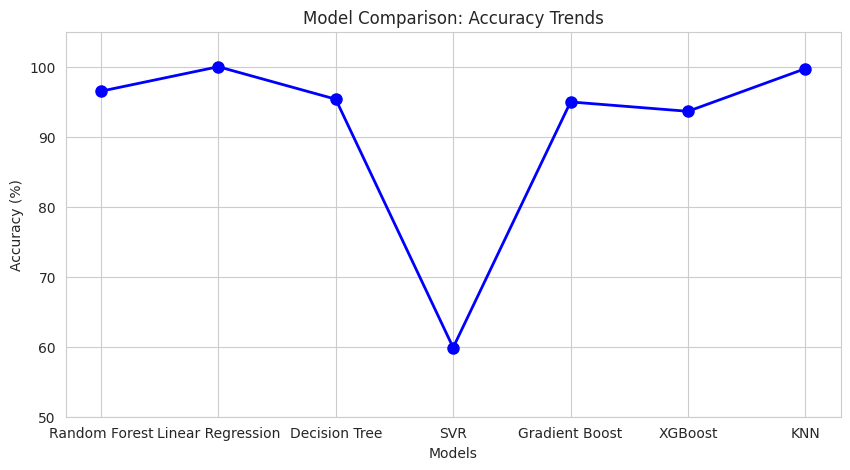

In [ ]:
#Plot 3: Line Plot - Model Accuracy Trends
plt.figure(figsize=(10, 5))
plt.plot(models, accuracy_values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.title("Model Comparison: Accuracy Trends")
plt.ylim(50, 105)  # Accuracy is percentage-based
plt.grid(True)
plt.show()

               Model  Mean Squared Error (MSE)  R² Score  Accuracy (%)
0      Random Forest                     23.22    0.9975         96.50
1  Linear Regression                      0.00    1.0000        100.00
2      Decision Tree                    428.03    0.9536         95.36
3                SVR                   3702.67    0.5988         59.88
4     Gradient Boost                    464.32    0.9497         94.97
5            XGBoost                    588.07    0.9363         93.63
6                KNN                     24.71    0.9973         99.73


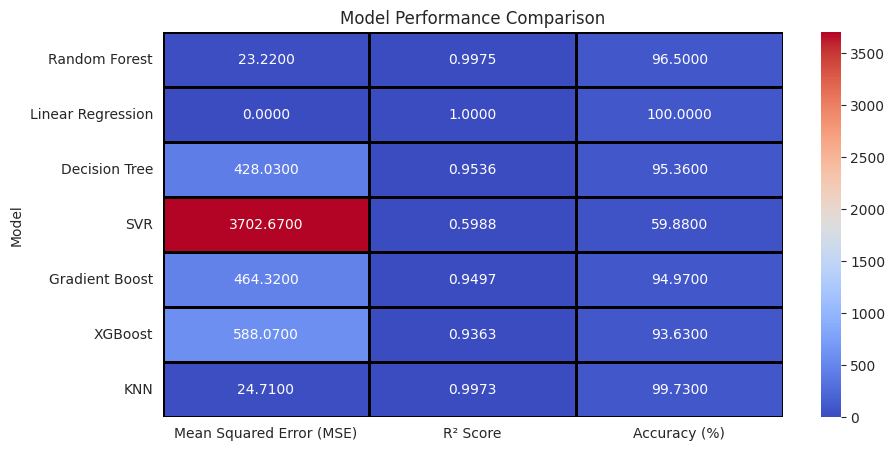

In [ ]:
#Tabular format
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model Names
models = ["Random Forest", "Linear Regression", "Decision Tree", "SVR", "Gradient Boost", "XGBoost", "KNN"]

# Performance Metrics
mse_values = [23.22, 3.53e-26, 428.03, 3702.67, 464.32, 588.07, 24.71]  # Mean Squared Error
r2_values = [0.9975, 1.0, 0.9536, 0.5988, 0.9497, 0.9363, 0.9973]  # R² Score
accuracy_values = [96.50, 100.00, 95.36, 59.88, 94.97, 93.63, 99.73]  # Accuracy %

# Create a DataFrame
df_results = pd.DataFrame({
    "Model": models,
    "Mean Squared Error (MSE)": mse_values,
    "R² Score": r2_values,
    "Accuracy (%)": accuracy_values
})

# Round values for better readability
df_results = df_results.round(4)

# Display the DataFrame
print(df_results)

#Styled Table Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df_results.set_index("Model"), annot=True, fmt=".4f", cmap="coolwarm", linewidths=1, linecolor="black")
plt.title("Model Performance Comparison")
plt.show()
